# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [64]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [65]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [66]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Reena\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


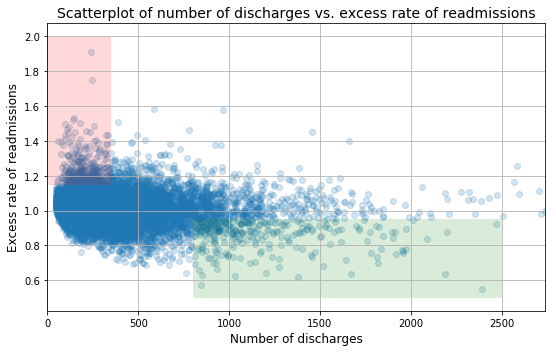

In [19]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## Part A:

In [92]:
hospital_read_df.head()
hospital_read_df['Number of Discharges']
hospital_read_df.shape

(13731, 12)

In [68]:
hospital_read_df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      13731
Excess Readmission Ratio       3129
Predicted Readmission Rate     3129
Expected Readmission Rate      3129
Number of Readmissions         5363
Start Date                        0
End Date                          0
dtype: int64

In [69]:
hospital_read_df.dropna(subset=['Excess Readmission Ratio'],inplace = True)

In [70]:
hospital_read_df.isnull().sum()
hospital_read_df['Number of Discharges']
y = hospital_read_df[hospital_read_df['Number of Discharges']!='Not Available']


In [71]:
y['Excess Readmission Ratio'].min()

0.5495

A. Initial observations based on the plot above
    1. Overall, rate of readmissions is trending down with increasing number of discharges
    2. With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
    3. With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 
    
Answers: 
   1.Rate of readmission trending down with increasing no of discharges is very difficult to tell from the above graph.
    Ideally, a correlation and/or regression line should be used to confirm a trend.
   2 and 3. There should be more grouping on No of discharges to get the detailed plot to confirm this statements.

B. Statistics
    - In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
    - In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1

In [72]:
df = clean_hospital_read_df[(clean_hospital_read_df['Excess Readmission Ratio'].notnull())]
low = df[(df['Number of Discharges'] < 100)]
print(df['Excess Readmission Ratio'].mean())
print(df['Excess Readmission Ratio'].describe())

1.0075037835957146
count    11497.000000
mean         1.007504
std          0.091964
min          0.549500
25%          0.952600
50%          1.003500
75%          1.058100
max          1.909500
Name: Excess Readmission Ratio, dtype: float64


In [73]:
high = df[(df['Number of Discharges'] > 1000)]
print(df['Excess Readmission Ratio'].mean())
print(df['Excess Readmission Ratio'].describe())

1.0075037835957146
count    11497.000000
mean         1.007504
std          0.091964
min          0.549500
25%          0.952600
50%          1.003500
75%          1.058100
max          1.909500
Name: Excess Readmission Ratio, dtype: float64


As seen from above this statements are almost correct.

C. Conclusions
    - There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
    - Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

Answer:  I see no evidence in the report that suggests significant correlation of any factors. A significance test is required.

D. Regulatory policy recommendations
    - Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
    - Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.
    
Answer: There is not single significance test to prove this.

## Part B:

- Setup an appropriate hypothesis test.
- Compute and report the observed significance value (or p-value).
- Report statistical significance for $\alpha$ = .01. 
- Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
- Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.


### Hypothesis test
Depending on the conclusion part,the objective of this analysis is to find out that if there is a significant correlation between hospital capacity (number of discharges) and readmission rates. 

Null hypothesis: Excess readmission ratio for hospitals with discharge rates less than 300 ("small") is the same as that for hospitals with discharge rates greater than 300 ("large").

Alternative hypothesis: Excess readmission ratio for hospitals with discharge rates less than 300 ("small") is NOT the same as that for hospitals with discharge rates greater than 300 ("large").

In [74]:
#Lets get the data small and large data set

df_small = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 300]
df_large = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 300]

small_ratio = df_small['Excess Readmission Ratio']
large_ratio = df_large['Excess Readmission Ratio']

# Mean
small_mean = np.mean(small_ratio)
large_mean = np.mean(large_ratio)

# Mean difference
mean_diff = small_mean - large_mean

# Calculate pvalue

SE = mean_diff / np.sqrt(small_ratio.var()/small_ratio.size + large_ratio.var()/large_ratio.size)
print("Standard error:", SE)

p_val = 2*(1-stats.norm.cdf(np.abs(SE)))
p_val

Standard error: 8.333817937510506


0.0

### Compute and report the observed significance value (or p-value).


A p-value close to zero signals that your null hypothesis is false, and typically that a difference is very likely to exist. So excess readmission ratio for hospitals with discharge rates less than 300 ("small") is NOT the same as that for hospitals with discharge rates greater than 300 ("large").

### Report statistical significance for $\alpha$ = .01

Look at the scatterplot above. 
    - What are the advantages and disadvantages of using this plot to convey information?
    - Construct another plot that conveys the same information in a more direct manner. 

Advantages:
    - clear labels 
    
Disadvantages:
    - The shaded areas are very misleading and not very useful.
    - Its very difficult to get any information as the plot is very crowded.
    - The main categories like small, medium and large hospitals are not segmented properly.

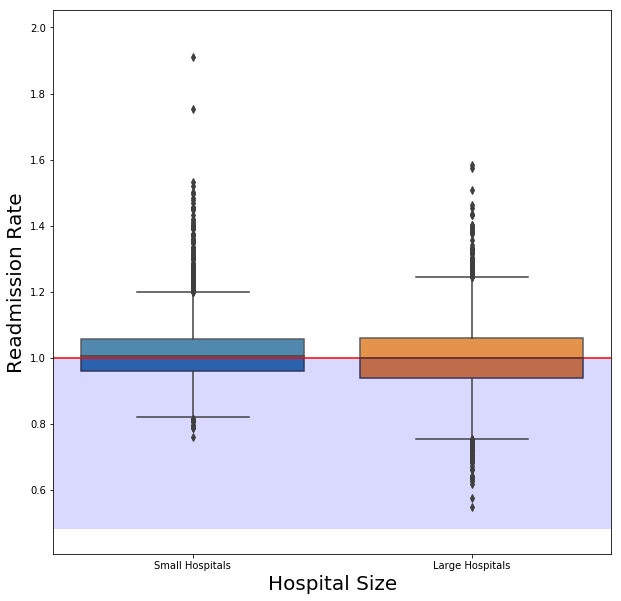

In [91]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=[df_small['Excess Readmission Ratio'],df_large['Excess Readmission Ratio']])
xmin,xmax=ax.get_xlim()
ymin,ymax=ax.get_ylim()
plt.hlines(y=1.0,xmin=xmin,xmax=xmax,color='r')
labels=['Small Hospitals','Large Hospitals']
ax.set_xlabel('Hospital Size',fontsize=20)
ax.set_ylabel('Readmission Rate',fontsize=20)
ax.set_xticklabels(labels)
ax.fill_between([xmin,xmax], 1,ymax, facecolor='white', alpha = .15, interpolate=True)
ax.fill_between([xmin,xmax], ymin, 1, facecolor='blue', alpha = .15, interpolate=True)